# YOLOv5

YOLOv5 không có quá nhiều thay đổi so với YOLOv4, nhưng nó đã được tối ưu hóa để chạy nhanh hơn và hiệu quả hơn.

## Backbone

### C3 Module

YOLOv5 cải tiến CSPResBlock của YOLOv4 thành một module mới, ít hơn một lớp Convolution gọi là C3 module. C3 module bao gồm 3 lớp Convolution, mỗi lớp Convolution sẽ được chia thành 3 phần nhỏ hơn, mỗi phần nhỏ sẽ được kết nối với một phần nhỏ của lớp Convolution tiếp theo. Điều này giúp giảm số lượng tham số và tăng tốc độ tính toán.

### Activation function
YOLOv4 sử dụng Mish hoặc LeakyReLU cho phiên bản nhẹ, còn sang YOLOv5, activation function được sử dụng là SiLU.

## Neck

### SPFF

YOLOv5 áp dụng một module giống với SPP, nhưng nhanh hơn gấp đôi và gọi đó là SPP - Fast (SPPF). Thay vì sử dụng MaxPooling song song như trong SPP, SPPF của YOLOv5 sử dụng MaxPooling tuần tự. Hơn nữa, kernel size trong MaxPooling của SPPF toàn bộ là 5 thay vì là 5, 9, 13 như trong SPP.

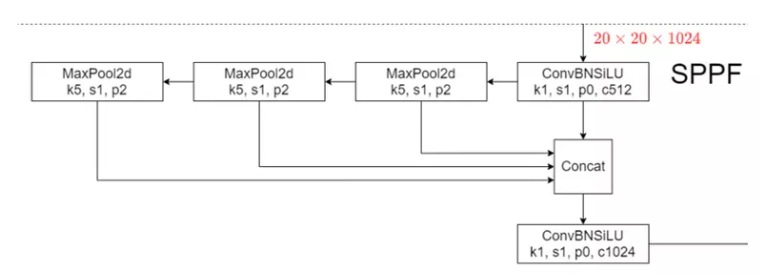

## Các thay đổi khác

### Loại bỏ Grid Sensitivity

Ở YOLOv5, ta sử dụng chủ yếu là Focal loss, một loại loss thường được sử dụng trong các bài toán phân loại, đặc biệt là khi có sự mất cân bằng giữa các lớp (imbalanced classes).

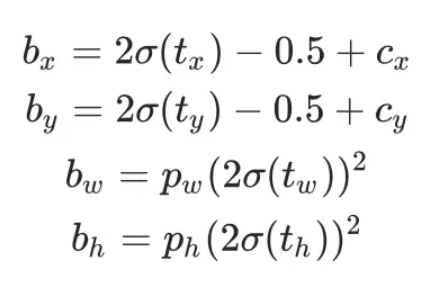

### Xử lý Data

- Moisac Augmentation:
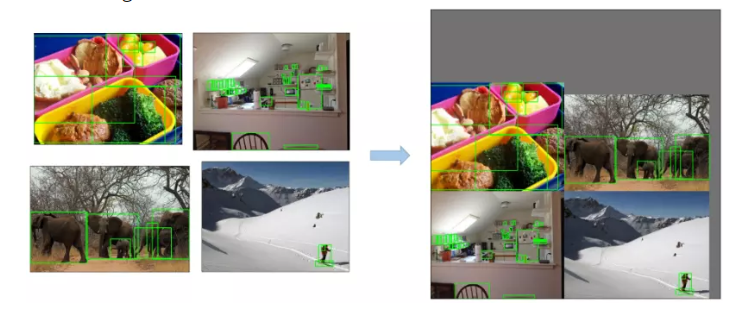

- Copy-Paste Augmentation:
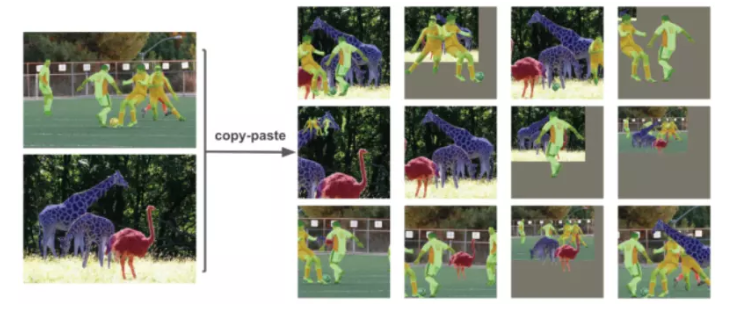

- Random Affine Augmentation:
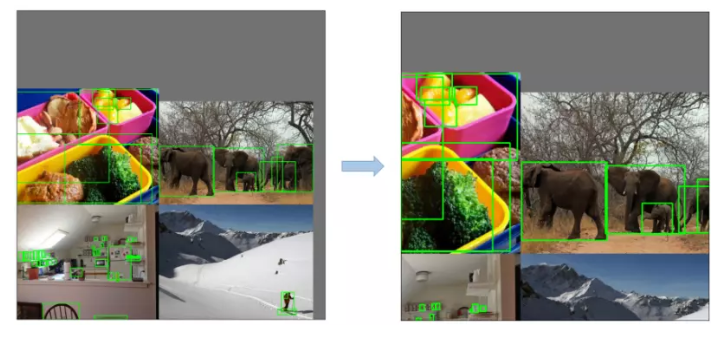

- MixUp Augmentation:
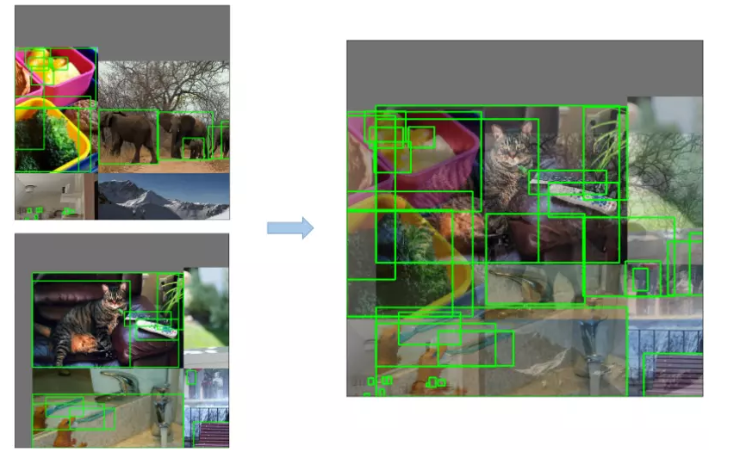

- Và các thay đổi về màu sắc cũng như là Random Flip của Albumentations

### EWA Weight

Thông thường, khi training, ta sẽ ngay lập tức cập nhất weight của model trong quá trình backward pass. Tuy nhiên, trong EMA, ta tạo ra một model y hệt với model chúng ta sử dụng trong training, nhưng cách cập nhật weight sẽ tuân theo công thức Exponential Moving Average (EMA)

### Anchor box

Có 2 sự thay đổi lớn:
- Auto Anchor: một kỹ thuất áp dụng giải thuật di truyền (Genetic Algorithm) vào Anchor box ở sau bước k-mean
- Offset tâm của object để lựa chọn nhiều Anchor Box cho một object. Ý tưởng được thể hiện trong hình dưới:

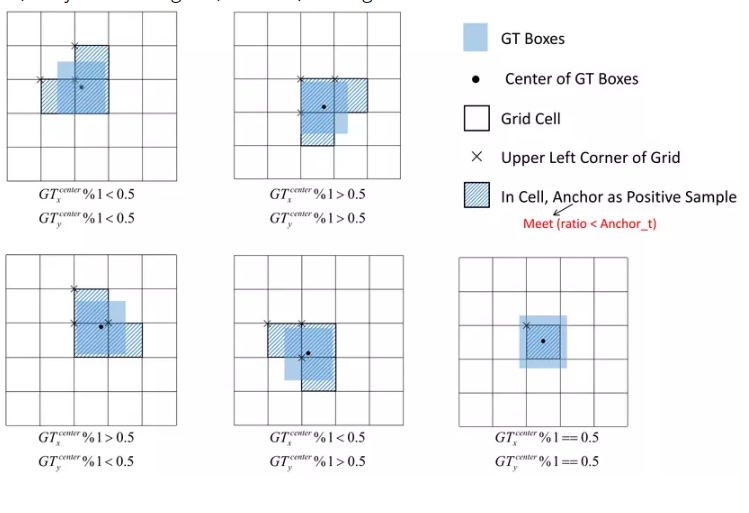

Các phương pháp trên khắc được điểm yếu của các phiên bản trước đây, thông thường, các hyper-parameters này sẽ được chọn thông qua thuật toán k-means (từ YOLOv2). Tuy nhiên, các Anchor Box được chọn bởi k-means đó thường đã bị fit trên COCO, và đôi lúc sẽ không hoạt động tốt với custom Dataset.

### Re-parameterization

Khi mà các bạn thực hiện inference với YOLOv5, nó thường xuất hiện dòng "Fusing layers..." như dưới:

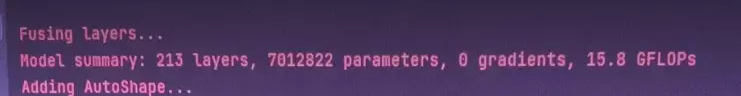

Đấy là YOLOv5 đang thực hiện hợp nhất lớp Convolution (Conv) và lớp BatchNorm (BN) vào làm một lớp, khiến việc inference diễn ra nhanh hơn (từ 2 layers là Conv + BN -> Conv). Quá trình hợp nhất này chỉ diễn ra trong lúc inference, còn trong lúc training model thì nó vẫn hoạt động như bình thường, là 2 lớp riêng biệt: Conv và BN. Đây gọi là kĩ thuật Re-param.

Với Batch Normalization, trong quá trình training, khi đưa một mini-batch B với m phần tử, ta sẽ tính được mean $\mu$ và variance $\sigma^2$ của mini-batch đó:

$$\mu = \frac{1}{m} \sum_{i=1}^{m} x_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^2$$

Với một đầu vào là vector x có d chiều, ta sẽ tiến hành normalized mỗi chiều:

$$\hat{x}_i^{(k)} = \frac{x_i^{(k)} - \mu^{(k)}}{\sqrt{\sigma^{(k)^2}}}$$

Với $k \in \{1, 2, ..., d\}$ và $i \in \{1, 2, ..., m\}$. $\hat{x}_i^{(k)}$ là giá trị thứ k của input x thứ i trong batch B sau khi được normalized.

### Architecture

=> Tóm tắt:

Kiến trúc của YOLOv4 nâng cấp lên YOLOv5 được tóm tắt như sau:

- Backbone: CSPResidualBlock --> C3 module
- Neck: SPP + PAN --> SPPF + PAN
- Head: Giữ nguyên từ YOLOv3

Các thay đổi khác trong YOLOv5 bao gồm:
- Data Augmentation: Mosaic Augmentation, Copy-paste Augmentation, MixUp Augmentation
- Loss function: Thêm hệ số scale cho Objectness Loss
- Anchor Box: Auto Anchor sử dụng GA
- Loại bỏ Grid Sensitivity nhưng công thức khác
- EMA Weight